# 09_eda_report.ipynb

# 📊 Emotion Recognition - EDA Report (Enhanced Version)

"""
This notebook performs Exploratory Data Analysis (EDA) on the final dataset generated from DeepFace annotations.
The goal is to uncover insights and distribution patterns among demographic features (age, gender, race) and facial emotions.

✅ Key analyses include:
- Emotion distribution (bar, pie)
- Emotion breakdown by gender, race, and age
- Age distribution per emotion
- Emotion grouped by age brackets

All visualizations are saved in `/figures/` folder for reporting or dashboard integration.
"""


✅ Downloaded final_emotion_dataset.parquet from GCS
✅ Loaded 31783 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31783 entries, 0 to 31782
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filename          31783 non-null  object
 1   age               31783 non-null  int64 
 2   gender            31783 non-null  object
 3   dominant_emotion  31783 non-null  object
 4   dominant_race     31783 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB
None
                age
count  31783.000000
mean      30.945285
std        4.487882
min       12.000000
25%       28.000000
50%       30.000000
75%       34.000000
max       60.000000
🔍 Missing values:
 Series([], dtype: int64)


<ipython-input-1-5d74293ae57b>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='coolwarm')


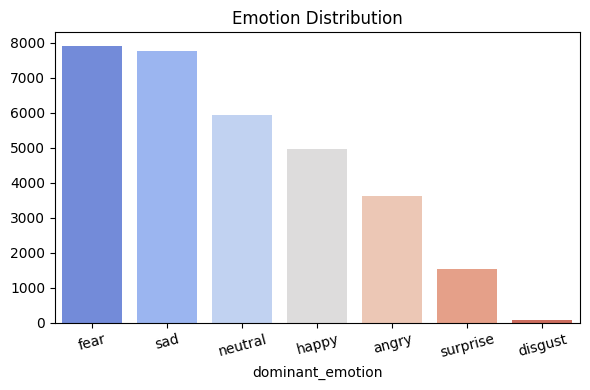

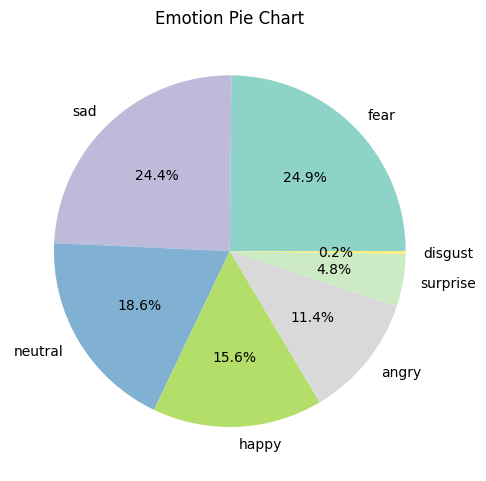

<ipython-input-1-5d74293ae57b>:68: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-1-5d74293ae57b>:69: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("figures/emotion_by_gender.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


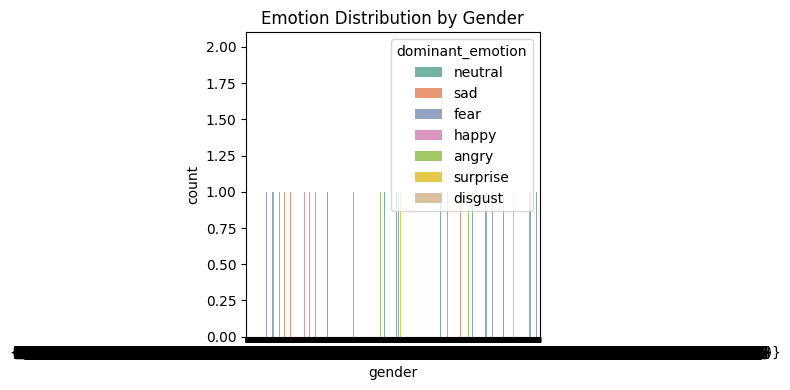

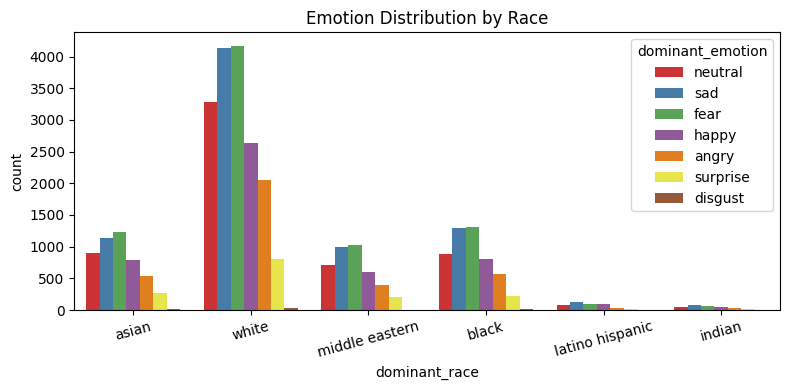

<ipython-input-1-5d74293ae57b>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dominant_emotion', y='age', palette='Pastel1')


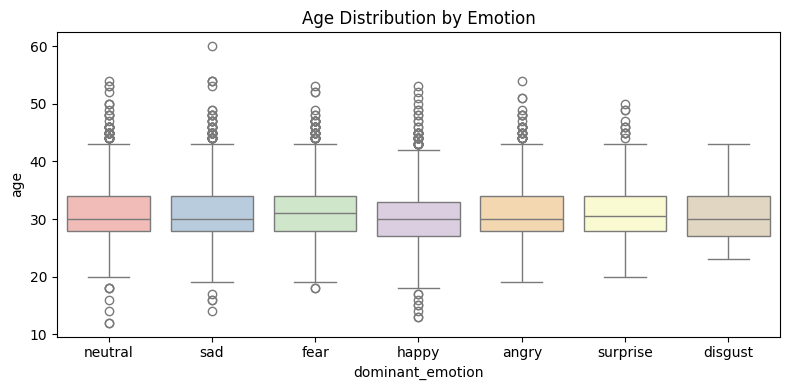

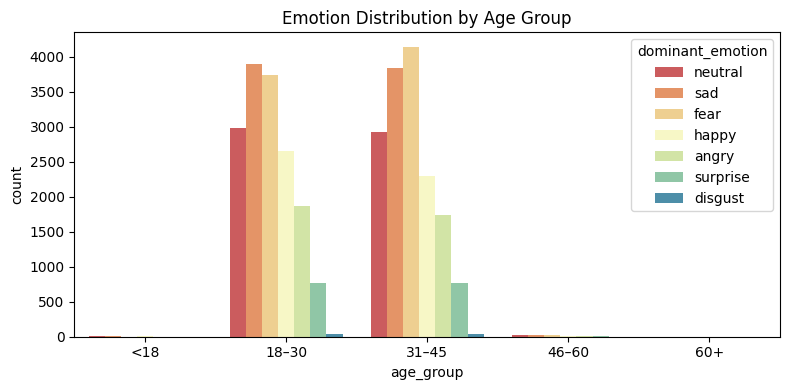

📊 EDA complete. Enhanced visualizations saved to /figures/


In [1]:
# 09_eda_reports.ipynb

# 📊 Emotion Recognition - EDA Report (Enhanced Version)

# ✅ Load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from google.colab import auth
from google.cloud import storage

# 🔐 Authenticate GCP
auth.authenticate_user()

# ✅ Load file from GCS
project_id = "exalted-summer-454012-d2"
bucket_name = "boothill2001-dataset"
blob_path = "dataset/final_emotion_dataset.parquet"
local_path = "final_emotion_dataset.parquet"

client = storage.Client(project=project_id)
bucket = client.bucket(bucket_name)
bucket.blob(blob_path).download_to_filename(local_path)
print("✅ Downloaded final_emotion_dataset.parquet from GCS")

# ✅ Tạo thư mục lưu hình nếu chưa có
os.makedirs("figures", exist_ok=True)

# ✅ Load final dataset
df = pd.read_parquet(local_path)
print(f"✅ Loaded {len(df)} rows")
df.head()

# ✅ Tổng quan dữ liệu
print(df.info())
print(df.describe())

# ✅ Missing values check
missing = df.isnull().sum()
print("🔍 Missing values:\n", missing[missing > 0])

# ✅ Phân bố cảm xúc
emotion_counts = df['dominant_emotion'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='coolwarm')
plt.title('Emotion Distribution')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("figures/emotion_barplot.png")
plt.show()

# ✅ Pie Chart cảm xúc
plt.figure(figsize=(5,5))
emotion_counts.plot(kind='pie', autopct='%1.1f%%', colormap='Set3')
plt.title("Emotion Pie Chart")
plt.ylabel("")
plt.tight_layout()
plt.savefig("figures/emotion_pie.png")
plt.show()

# ✅ Gender vs Emotion
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='gender', hue='dominant_emotion', palette='Set2')
plt.title("Emotion Distribution by Gender")
plt.tight_layout()
plt.savefig("figures/emotion_by_gender.png")
plt.show()

# ✅ Race vs Emotion
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='dominant_race', hue='dominant_emotion', palette='Set1')
plt.title("Emotion Distribution by Race")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("figures/emotion_by_race.png")
plt.show()

# ✅ Boxplot Age vs Emotion
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='dominant_emotion', y='age', palette='Pastel1')
plt.title("Age Distribution by Emotion")
plt.tight_layout()
plt.savefig("figures/age_by_emotion.png")
plt.show()

# ✅ Emotion vs Age Group
age_bins = [0, 18, 30, 45, 60, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=["<18", "18–30", "31–45", "46–60", "60+"])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='age_group', hue='dominant_emotion', palette='Spectral')
plt.title("Emotion Distribution by Age Group")
plt.tight_layout()
plt.savefig("figures/emotion_by_age_group.png")
plt.show()

print("📊 EDA complete. Enhanced visualizations saved to /figures/")
